In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/sensor.csv', na_values='na')
df.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1056758.0,0.0,42328.0,856.0,0.0,0.0,0.0,50394.0,184552.0,2116260.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0
1,1665858.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4210.0,...,15655546.0,7961190.0,15573746.0,13337708.0,9939694.0,6375252.0,6517696.0,180452.0,0.0,0.0
2,341116.0,NaN,730.0,NaN,0.0,0.0,0.0,6782.0,243092.0,2693264.0,...,1392970.0,670836.0,1622420.0,2006306.0,5831812.0,3198600.0,47068.0,0.0,0.0,0.0
3,207292.0,NaN,3418.0,NaN,0.0,0.0,0.0,34086.0,300110.0,2063184.0,...,1075284.0,748704.0,1892554.0,2372806.0,3308370.0,176844.0,4860.0,0.0,0.0,0.0
4,1386134.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,37938.0,...,11849780.0,6078744.0,11391988.0,9705102.0,10601346.0,5264516.0,6692608.0,634500.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35002 entries, 0 to 35001
Columns: 171 entries, aa_000 to eg_000
dtypes: float64(170), object(1)
memory usage: 45.7+ MB


In [4]:
input_columns = [col for col in df.columns if df[col].dtype != 'O']
target_columns = [col for col in df.columns if df[col].dtype == 'O']

In [5]:
input_columns

['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

In [6]:
target_columns

['class']

In [7]:
# checking the imbalance of target column
df[target_columns].value_counts()

class
neg      34020
pos        981
dtype: int64

<AxesSubplot: xlabel='class'>

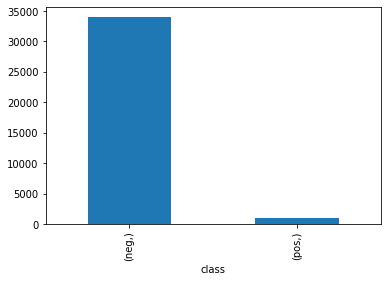

In [8]:
df[target_columns].value_counts().plot(kind= 'bar') # this is a biased dataset

In [9]:
# checking missing values

df.isna().sum()

aa_000        1
ab_000    26995
ac_000     2083
ad_000     8921
ae_000     1543
          ...  
ee_007      369
ee_008      369
ee_009      369
ef_000     1685
eg_000     1684
Length: 171, dtype: int64

In [10]:
round(df.isna().sum().div(df.shape[0]).mul(100),3).to_frame().reset_index()

,index,0
0,aa_000,0.003
1,ab_000,77.124
2,ac_000,5.951
3,ad_000,25.487
4,ae_000,4.408
...,...,...
166,ee_007,1.054
167,ee_008,1.054
168,ee_009,1.054
169,ef_000,4.814


In [11]:
perc_null_df = (round(df.isna().sum().div(df.shape[0]).mul(100),3)).to_frame().reset_index().sort_values(by=[0], ascending=False)
perc_null_df

,index,0
78,br_000,81.350
77,bq_000,80.438
76,bp_000,78.713
113,cr_000,77.124
1,ab_000,77.124
...,...,...
95,cj_000,0.569
94,ci_000,0.569
80,bt_000,0.240
98,class,0.003


In [12]:
perc_null_df.rename(columns={'index':'col_name',0:'Perc_nul_val'}, inplace=True)

In [13]:
perc_null_df.columns

Index(['col_name', 'Perc_nul_val'], dtype='object')

In [14]:
drop_cols = perc_null_df[perc_null_df['Perc_nul_val']>70]
drop_cols

,col_name,Perc_nul_val
78,br_000,81.350
77,bq_000,80.438
76,bp_000,78.713
113,cr_000,77.124
1,ab_000,77.124
75,bo_000,76.467
74,bn_000,72.702


In [15]:
df.shape

(35002, 171)

In [16]:
df.drop(drop_cols['col_name'], axis=1, inplace= True) # axis=1 for column and axis=0 for rows

In [17]:
df.shape

(35002, 164)

In [18]:
df.isna().sum().sum()

309391

In [19]:
np.product(df.shape)

5740328

In [20]:
f"Percentage missing : {round(df.isna().sum().sum()/np.product(df.shape)*100,2)}%"

'Percentage missing : 5.39%'

## Univerate analysis

<Figure size 216x216 with 0 Axes>

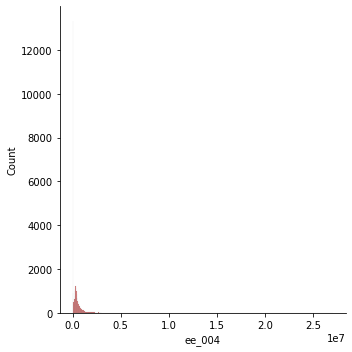

In [21]:
plt.figure(figsize=(3,3))
sns.displot(df['ee_004'],color='indianred')

In [22]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'O']
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

C:\Users\LikithP\AppData\Local\Temp\ipykernel_19780\2530798759.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(60,3,i+1)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000022051DF2940> (for post_execute):



KeyboardInterrupt



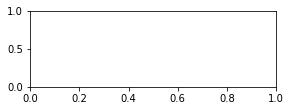

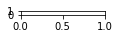

Error in callback <function flush_figures at 0x0000022061C53820> (for post_execute):



KeyboardInterrupt



In [23]:
plt.figure(figsize=(15,100))
for i, col in enumerate(numerical_columns):
    plt.subplot(60,3,i+1)
    sns.displot(x=df[col],color='indianred')
    plt.xlabel(col, weight = 'bold')
    plt.tight_layout()

In [24]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
#from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer

In [25]:
def evaluate_model(true,predicted):
    """
    This function takes in true values and predicted values and compares it
    Returns: Accuracy,F1-Score,Precision,Recall, Roc-auc Score
    """
    
    acc = accuracy_score(true,predicted) # Calcuate Accuracy
    f1 = f1_score(true,predicted)
    precesion = precision_score(true,predicted)
    recall = recall_score(true,predicted)
    roc_auc = roc_auc_score(true,predicted)
    return acc ,f1,precesion,recall,roc_auc

In [26]:
# Create cost of the model as per data description
def total_cost(y_true,y_pred):
    '''
    This function takes y_true and y_predected and prints Total cost due to misclassification 
    '''
    
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
    cost =10*fp +500*fn
    
    return cost

In [27]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
#     "XGBClassifier": XGBClassifier(), 
#      "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [50]:
## create a function which can evaluate model and returns a report

def evaluate(X,y,models):
    '''
    This function takes X ,y and model as input
    It splits into train and test
    evalute the metrics for train and test
    Return: Dataframe which contains report of all models metrics with cost
    '''
    
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=40)
    
    cost_list=[]
    models_list=[]
    accuracy_list=[]
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        print(model)
        model.fit(X_train,y_train)
        
        #Making the Prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Training set perforamnce
        model_train_acc,model_train_f1,model_train_precission,model_train_recall, \
        model_train_roc = evaluate_model(y_train,y_train_pred)
        train_cost= total_cost(y_train,y_train_pred)
        
        # test set perforamnce
        model_test_acc,model_test_f1,model_test_precission,model_test_recall, \
        model_test_roc = evaluate_model(y_test,y_test_pred)
        test_cost= total_cost(y_test,y_test_pred)
        
        print("Model Name - ",list(models.keys())[i]) ### It will print the algo name
        models_list.append(list(models.keys())[i])
        cost_list.append(test_cost)
        
        
        print('######## Model performance for training set ########')
        print(f"Accuracy------------>{model_train_acc}")
        print(f"F1 score------------>{model_train_f1}")
        print(f"Precesion----------->{model_train_precission}")
        print(f"Recall-------------->{model_train_recall}")
        print(f"Roc Auc Score------->{model_train_roc}")
        
        print('######## Model performance for test set ########')
        print(f"Accuracy------------>{model_test_acc}")
        print(f"F1 score------------>{model_test_f1}")
        print(f"Precesion----------->{model_test_precission}")
        print(f"Recall-------------->{model_test_recall}")
        print(f"Roc Auc Score------->{model_test_roc}")
        print("\n")
    report = pd.DataFrame(list(zip(models_list,cost_list)),columns=['ModelName','Cost']).sort_values(by=['Cost'])
    
    return report

In [29]:
X= df.drop('class',axis=1)
y = df['class']

In [30]:
X

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1056758.0,4.232800e+04,856.0,0.0,0.0,0.0,50394.0,184552.0,2116260.0,8359268.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0
1,1665858.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4210.0,847684.0,...,15655546.0,7961190.0,15573746.0,13337708.0,9939694.0,6375252.0,6517696.0,180452.0,0.0,0.0
2,341116.0,7.300000e+02,NaN,0.0,0.0,0.0,6782.0,243092.0,2693264.0,10294678.0,...,1392970.0,670836.0,1622420.0,2006306.0,5831812.0,3198600.0,47068.0,0.0,0.0,0.0
3,207292.0,3.418000e+03,NaN,0.0,0.0,0.0,34086.0,300110.0,2063184.0,6215198.0,...,1075284.0,748704.0,1892554.0,2372806.0,3308370.0,176844.0,4860.0,0.0,0.0,0.0
4,1386134.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,37938.0,2413744.0,...,11849780.0,6078744.0,11391988.0,9705102.0,10601346.0,5264516.0,6692608.0,634500.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34997,37258.0,1.104000e+03,994.0,0.0,0.0,0.0,0.0,0.0,0.0,7350.0,...,336870.0,187466.0,402948.0,334876.0,238864.0,123876.0,69168.0,126.0,0.0,0.0
34998,26.0,2.130706e+09,16.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,...,492.0,16.0,46.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0
34999,38024.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1094.0,...,289008.0,150976.0,318968.0,206590.0,165736.0,136416.0,347438.0,22926.0,0.0,0.0
35000,11778.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,24.0,45020.0,...,404550.0,197372.0,50056.0,12084.0,4608.0,2236.0,2936.0,0.0,0.0,0.0


In [31]:
X= X[0:35001]

In [32]:
y = y.replace({'pos':1,'neg':0})

In [33]:
y.isna().sum()

1

In [34]:
y= y.dropna()

In [35]:
y.isna().sum()

0

In [36]:
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [38]:
import warnings
warnings.filterwarnings('ignore')

### Experiment -1 KNN Imputer

In [39]:
results = []
imputer = KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')
strategies =[str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i',KNNImputer(n_neighbors=int(s))),('m',LogisticRegression())])
    scores = cross_val_score(pipeline,X1,y,scoring='accuracy',cv=2)
    results.append(scores)
    print(f"{s}--->{scores}")

1--->[0.67933261 0.71177143]
3--->[0.69498886 0.70982857]
5--->[0.7032741  0.66937143]
7--->[0.71333067 0.68491429]
9--->[0.64264899 0.70737143]


In [40]:
from statistics import mean

for m, i in zip([1,3,5,7,9], results):
    print(f"{m}--->   Accuracy - {round(mean(i)*100,2)}%")

1--->   Accuracy - 69.56%
3--->   Accuracy - 70.24%
5--->   Accuracy - 68.63%
7--->   Accuracy - 69.91%
9--->   Accuracy - 67.5%


### **We can observe n_neighbors=3 able to produce highest accuracy**

### Feature Engineering Basic Steps
- 1st step ---- Filling the null values using Imputers(KNNImputer,Mean IMputer,Median Imputer,MICE)
- 2nd step ---- Scaling the data and removing outliers(robust scaler)
- 3rd step ---- Balancing the target column (SMOTEK)

## Pipeline for KNN imputer

In [41]:
knn_pipeline = Pipeline(
steps=[
    ('filling_null_values',KNNImputer(n_neighbors=3)),
    ('scaling_and_removing_outliers',RobustScaler())
])

In [42]:
X_knn = knn_pipeline.fit_transform(X)

In [45]:
from imblearn.combine import SMOTETomek

In [46]:
smt = SMOTETomek(random_state=43,sampling_strategy='minority')
X_res,y_res =smt.fit_resample(X_knn,y)

In [48]:
knn_report = evaluate(X_res,y_res,models)

RandomForestClassifier()
Model Name -  Random Forest
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9927467861776152
F1 score------------>0.9929411764705882
Precesion----------->0.9893641354071363
Recall-------------->0.9965441769381408
Roc Auc Score------->0.9926541109409804


DecisionTreeClassifier()
Model Name -  Decision Tree
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9839603726854582
F1 score------------>0.9843803835994027
Precesion----------->0.9814496736516661
Recall-------------->0.9873286487731828
Roc Auc Score------->0.9838781699828218


GradientBoostingClassifier()
Model N

In [51]:
knn_report

,ModelName,Cost
0,Random Forest,15930
1,Decision Tree,56620
2,Gradient Boosting,58700
4,K-Neighbors Classifier,65670
5,AdaBoost Classifier,115350
3,Logistic Regression,387650


### Experiment - 2 Simple Imputer with strategy mean

In [54]:
# 1st step and 2nd step
median_pipeline = Pipeline(
steps = [
    ('filling_missing_values', SimpleImputer(strategy='median')),
    ('scaling_and_removing_outliers', RobustScaler())
])

In [55]:
X_median = median_pipeline.fit_transform(X)

In [56]:
smt = SMOTETomek(random_state=7, sampling_strategy='minority')
X_res, y_res = smt.fit_resample(X_median,y)

In [57]:
report_median = evaluate(X_res,y_res,models)

RandomForestClassifier()
Model Name -  Random Forest
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.992500295263966
F1 score------------>0.9926423729795493
Precesion----------->0.9891467497979448
Recall-------------->0.9961627906976744
Roc Auc Score------->0.992441846512744


DecisionTreeClassifier()
Model Name -  Decision Tree
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9857682768394945
F1 score------------>0.9860184486859663
Precesion----------->0.9839064489984949
Recall-------------->0.988139534883721
Roc Auc Score------->0.9857304345884887


GradientBoostingClassifier()
Model Name

In [58]:
report_median

,ModelName,Cost
0,Random Forest,17440
1,Decision Tree,52390
2,Gradient Boosting,59910
4,K-Neighbors Classifier,70760
5,AdaBoost Classifier,116280
3,Logistic Regression,451510


### Experiment - 3  Simple Imputer with strategy constant

In [59]:
constant_pipeline = Pipeline(
steps = [
    ('filling_missing_values', SimpleImputer(strategy='constant',fill_value=0)),
    ('scaling_and_removing_outliers', RobustScaler())
])

In [60]:
X_constant = constant_pipeline.fit_transform(X)

In [61]:
const_smt = SMOTETomek(random_state=7,sampling_strategy='minority')
X_res, y_res = const_smt.fit_resample(X_constant,y)

In [62]:
report_constant = evaluate(X_res, y_res, models)

RandomForestClassifier()
Model Name -  Random Forest
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9919773478055687
F1 score------------>0.9921223354958295
Precesion----------->0.9883439122908252
Recall-------------->0.9959297592743342
Roc Auc Score------->0.9919191475648579


DecisionTreeClassifier()
Model Name -  Decision Tree
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9852524775837659
F1 score------------>0.9855139645381851
Precesion----------->0.9820995496015706
Recall-------------->0.9889522037446214
Roc Auc Score------->0.9851979981969845


GradientBoostingClassifier()
Model N

In [63]:
report_constant

,ModelName,Cost
0,Random Forest,18510
1,Decision Tree,49050
4,K-Neighbors Classifier,59440
2,Gradient Boosting,72800
5,AdaBoost Classifier,106080
3,Logistic Regression,128370


### Experiment - 4   Simple Imputer with strategy mean

In [64]:
mean_pipeline = Pipeline(
steps = [
    ("filling_missing_values", SimpleImputer(strategy='mean')),
    ("scaling_and_removing_outliers", RobustScaler())
])

In [65]:
X_mean = mean_pipeline.fit_transform(X)

In [66]:
mean_smt = SMOTETomek(random_state=7, sampling_strategy='minority')
X_res, y_res = mean_smt.fit_resample(X_mean,y)

In [67]:
mean_report = evaluate(X_res, y_res, models)

RandomForestClassifier()
Model Name -  Random Forest
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9928078759653364
F1 score------------>0.9929471615215631
Precesion----------->0.9888313183649972
Recall-------------->0.9970974108905143
Roc Auc Score------->0.9927403222117241


DecisionTreeClassifier()
Model Name -  Decision Tree
######## Model performance for training set ########
Accuracy------------>1.0
F1 score------------>1.0
Precesion----------->1.0
Recall-------------->1.0
Roc Auc Score------->1.0
######## Model performance for test set ########
Accuracy------------>0.9843188115309792
F1 score------------>0.9846207215541165
Precesion----------->0.9806518484394794
Recall-------------->0.9886218506908162
Roc Auc Score------->0.9842510451058871


GradientBoostingClassifier()
Model N

In [68]:
mean_report

,ModelName,Cost
0,Random Forest,13470
2,Gradient Boosting,45850
1,Decision Tree,50680
4,K-Neighbors Classifier,56920
5,AdaBoost Classifier,112740
3,Logistic Regression,399430


### Best models choosen with least cost with all the experiments

In [ ]:
#### Experiment -1 KNN Imputer with list cost
Random Forest	15930

#### Experiment - 2 Simple Imputer with strategy mean with list cost
Random Forest	17440

#### Experiment - 3  Simple Imputer with strategy constant with list cost
Random Forest	18510

#### Experiment - 4   Simple Imputer with strategy mean with list cost
Random Forest	13470

#### From the above result summary, we got Random Forest which is giving least cost, so we can conclude that the Random Forest 
#### model is the best model so far.